<div align="center">
  <h1>АДЭФС. Лабораторная работа №3</h1>
</div>
<div align="right">
  <h3>Студента 3 курса 8 группы</h3>
</div>
<div align="right">
  <h3>Зарецкого A.O.</h3>
</div>
<div align="center">
  <h2>Отчет о выполнении</h2>
</div>
<div align="center">
  <h2>Содержание</h2>
</div>

1. Загрузка и предварительный анализ данных
2. Подготовка данных для кластеризации
3. Кластеризация методом k-средних (k=4)
4. Расчет интегрального показателя кредитоспособности
5. Перенумерация кластеров по среднему интегральному показателю
6. Визуализация результатов
7. Анализ характеристик кластеров

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## 1. Загрузка и предварительный анализ данных

In [ ]:

df = pd.read_csv(r'../data/Annual 2005-2011.csv') 

print("Размерность данных:", df.shape)
print("\nПервые 5 строк данных:")

print("\nИнформация о данных:")
print(df.head())
print(df.info())

print(df.describe())
print("\nСтатистическое описание:")

Размерность данных: (2695, 22)

Первые 5 строк данных:
   empl_num        k1        k2        k3        k4        k5        k6  \
0    6095.0  0.942380  0.060563  0.678302 -0.161531  0.202055  0.165019   
1     255.0  1.980494  0.274382  0.916775  0.624425  0.089377  0.220648   
2     114.0  0.374160  0.001494  0.085138 -1.504990  0.235739  0.508929   
3     365.0  7.859079  0.831978  2.449864  0.875862  0.059439  0.030030   
4     168.0  1.779376  0.005596  0.883293  0.527853  0.135491  0.886686   

         k7        k8         k9  ...       k12       k13        k14  \
0  0.399033  0.799019   5.426569  ...  1.082798  0.655937   4.454819   
1  0.000000  0.933519  14.041958  ...  1.123828  0.705951  10.618881   
2  0.888889  0.779049   5.017007  ...  1.185374  0.123415   0.794785   
3  0.011111  0.942010  16.244444  ...  1.309449  2.804607  48.363889   
4  0.489796  0.887341  10.558673  ...  0.994832  0.473041   5.628827   

         k15       k16          k17       k18       k19      

## 2. Подготовка данных для кластеризации

In [14]:
features = [col for col in df.columns if col not in ['empl_num', 'year']]
print("Признаки для кластеризации:", features)

X = df[features].copy()

print("\nПропущенные значения:")
print(X.isnull().sum())

if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())
    print("Пропущенные значения заполнены медианой")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nДанные подготовлены: {X_scaled.shape}")

Признаки для кластеризации: ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k20']

Пропущенные значения:
k1     0
k2     0
k3     0
k4     0
k5     0
k6     0
k7     0
k8     0
k9     0
k10    0
k11    0
k12    0
k13    0
k14    0
k15    0
k16    0
k17    0
k18    0
k19    0
k20    0
dtype: int64

Данные подготовлены: (2695, 20)


## 3. Кластеризация методом k-средних (k=4)

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters
df['cluster_original'] = clusters.copy()  # сохраняем оригинальную нумерацию

print("Кластеризация завершена!")
print("Распределение по кластерам:")
print(df['cluster'].value_counts().sort_index())

Кластеризация завершена!
Распределение по кластерам:
cluster
0     779
1     225
2     670
3    1021
Name: count, dtype: int64


## 4. Расчет интегрального показателя кредитоспособности

In [17]:
# для демонстрации используем среднее по всем признакам (кроме кластера)
financial_features = [col for col in features if col not in ['cluster', 'cluster_original']]
df['integral_score'] = df[financial_features].mean(axis=1)

print("Интегральный показатель рассчитан")
print("Статистика интегрального показателя:")
print(df['integral_score'].describe())

Интегральный показатель рассчитан
Статистика интегрального показателя:
count    2695.000000
mean       12.158737
std       113.034609
min         0.533491
25%         2.169333
50%         3.143647
75%         5.082165
max      5209.625174
Name: integral_score, dtype: float64


## 5. Перенумерация кластеров по среднему интегральному показателю

In [18]:
cluster_means = df.groupby('cluster')['integral_score'].mean()
print("Средние значения интегрального показателя по кластерам:")
print(cluster_means)

cluster_mapping = {old: new for new, (old, _) in enumerate(cluster_means.sort_values(ascending=False).items(), 1)}
print("\nСоответствие старых и новых номеров кластеров:")
print(cluster_mapping)

df['cluster_renumbered'] = df['cluster'].map(cluster_mapping)

print("\nНовое распределение по кластерам:")
cluster_distribution = df['cluster_renumbered'].value_counts().sort_index()
print(cluster_distribution)

Средние значения интегрального показателя по кластерам:
cluster
0     4.905268
1    13.164584
2    21.322612
3    11.457797
Name: integral_score, dtype: float64

Соответствие старых и новых номеров кластеров:
{2: 1, 1: 2, 3: 3, 0: 4}

Новое распределение по кластерам:
cluster_renumbered
1     670
2     225
3    1021
4     779
Name: count, dtype: int64


## 6. Визуализация результатов

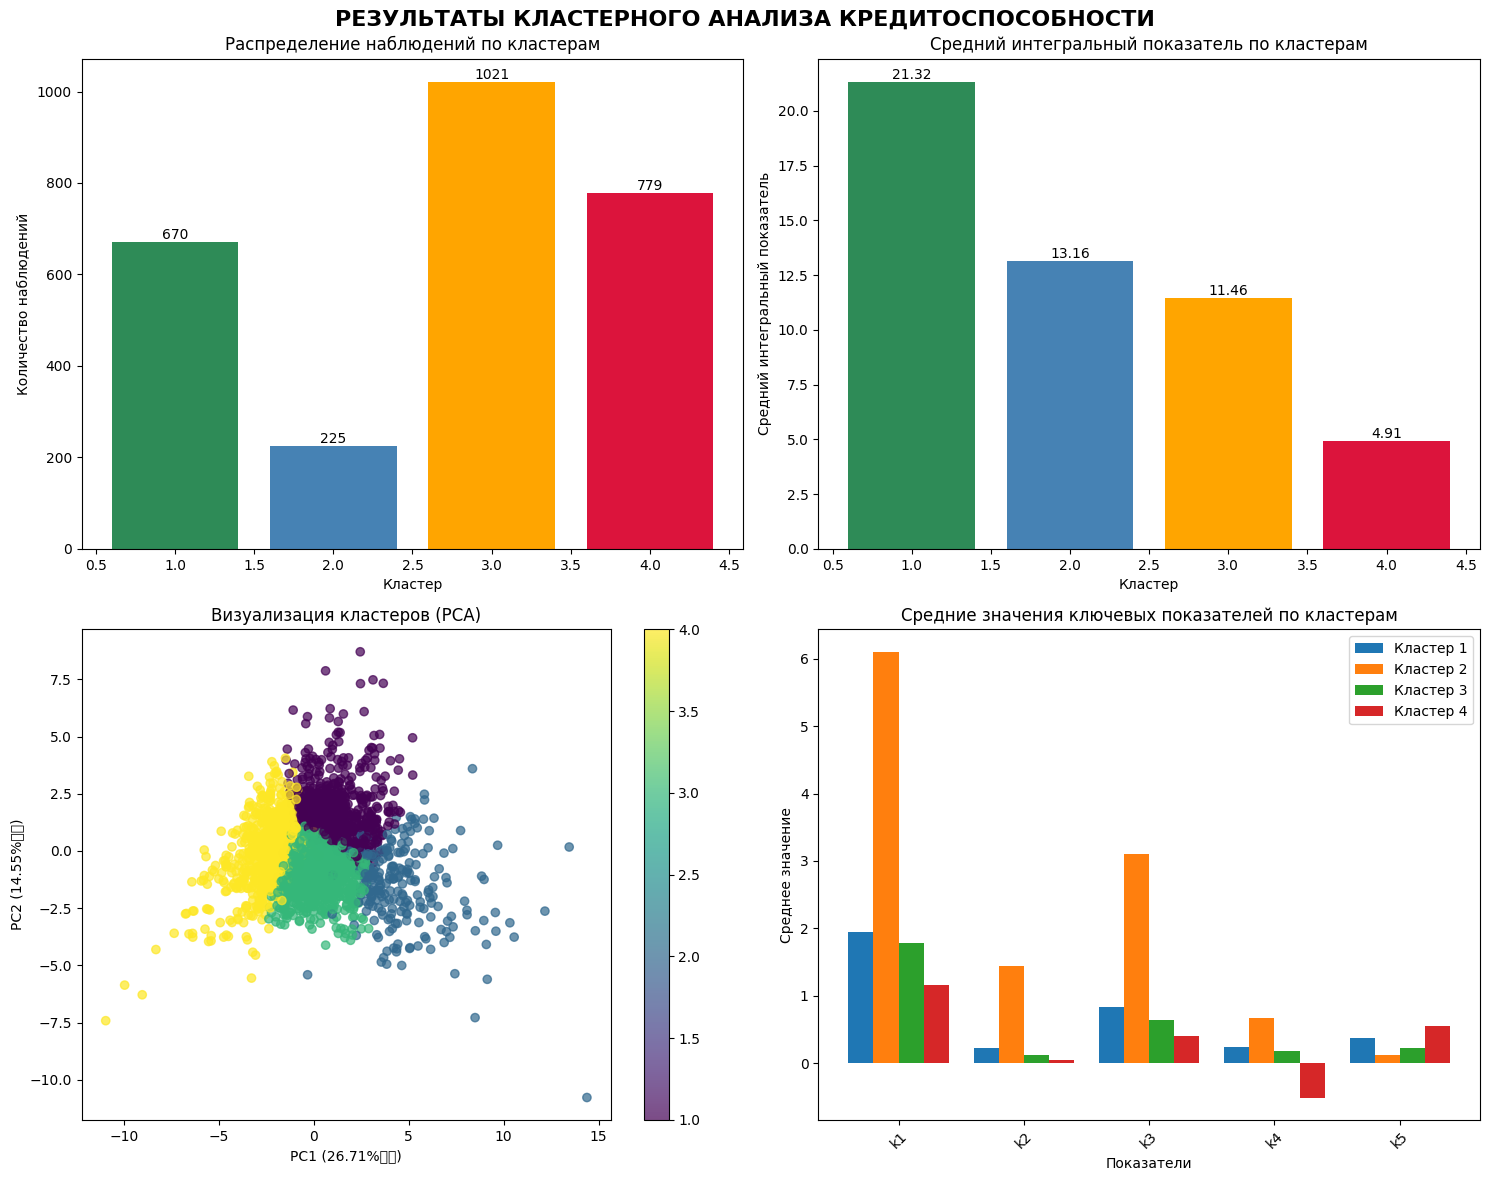

In [19]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('РЕЗУЛЬТАТЫ КЛАСТЕРНОГО АНАЛИЗА КРЕДИТОСПОСОБНОСТИ', fontsize=16, fontweight='bold')

axes[0,0].bar(cluster_distribution.index, cluster_distribution.values, 
              color=['#2E8B57', '#4682B4', '#FFA500', '#DC143C'])
axes[0,0].set_title('Распределение наблюдений по кластерам')
axes[0,0].set_xlabel('Кластер')
axes[0,0].set_ylabel('Количество наблюдений')
for i, v in enumerate(cluster_distribution.values):
    axes[0,0].text(i+1, v, str(v), ha='center', va='bottom')

renumbered_means = df.groupby('cluster_renumbered')['integral_score'].mean()
colors = ['#2E8B57', '#4682B4', '#FFA500', '#DC143C']  # зеленый -> красный (лучший -> худший)
axes[0,1].bar(renumbered_means.index, renumbered_means.values, color=colors)
axes[0,1].set_title('Средний интегральный показатель по кластерам')
axes[0,1].set_xlabel('Кластер')
axes[0,1].set_ylabel('Средний интегральный показатель')
for i, v in enumerate(renumbered_means.values):
    axes[0,1].text(i+1, v, f'{v:.2f}', ha='center', va='bottom')

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

scatter = axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster_renumbered'], 
                           cmap='viridis', alpha=0.7)
axes[1,0].set_title('Визуализация кластеров (PCA)')
axes[1,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%}方差)')
axes[1,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%}方差)')
plt.colorbar(scatter, ax=axes[1,0])

key_features = features[:5]  
cluster_profiles = df.groupby('cluster_renumbered')[key_features].mean()

x = np.arange(len(key_features))
width = 0.2
for i, cluster in enumerate(sorted(df['cluster_renumbered'].unique())):
    axes[1,1].bar(x + i*width, cluster_profiles.loc[cluster], width, 
                 label=f'Кластер {cluster}')
axes[1,1].set_title('Средние значения ключевых показателей по кластерам')
axes[1,1].set_xlabel('Показатели')
axes[1,1].set_ylabel('Среднее значение')
axes[1,1].set_xticks(x + width*1.5)
axes[1,1].set_xticklabels(key_features, rotation=45)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 7. Анализ характеристик кластеров

In [20]:
cluster_analysis = df.groupby('cluster_renumbered').agg({
    'integral_score': ['mean', 'std', 'min', 'max'],
    'empl_num': 'mean',
    'k1': 'mean',
    'k2': 'mean',
    'k3': 'mean'
}).round(3)

print("Статистика по кластерам:")
print(cluster_analysis)

Статистика по кластерам:
                   integral_score                            empl_num     k1  \
                             mean      std    min       max      mean   mean   
cluster_renumbered                                                             
1                          21.323  211.144  0.697  5209.625  1324.769  1.944   
2                          13.165   74.861  2.228  1122.591  1352.236  6.102   
3                          11.458   50.942  0.806   795.934  1351.264  1.778   
4                           4.905   27.657  0.533   522.726   922.330  1.162   

                       k2     k3  
                     mean   mean  
cluster_renumbered                
1                   0.220  0.837  
2                   1.436  3.105  
3                   0.126  0.635  
4                   0.054  0.406  
